## Import necessary libraries and modules

In [3]:
# These libraries are essential for tasks such as data preprocessing, model building, and evaluation.

# The libraries imported include:
# - NumPy: For numerical operations and array handling.
# - Pandas: For data manipulation and analysis.
# - Matplotlib and Seaborn: For data visualization.
# - Scikit-Learn: For machine learning models and evaluation metrics.
# - Imbalanced-Learn (imblearn): For handling imbalanced datasets.
# - SMOTE: A specific method for oversampling imbalanced data.
# - StandardScaler: For standardizing feature scaling.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    StackingClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomTreesEmbedding,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler





In [4]:
# ### Description:
# This function performs custom encoding for a categorical variable in a Pandas Series, 'y'. It maps specific categories to numerical values based on a predefined dictionary. The mapping is useful for converting categorical labels into a format suitable for machine learning models.

# ### Parameters:
# - y: Pandas Series
#   - Input categorical variable to be encoded.

# ### Returns:
# - y_encoded: Pandas Series
#   - The encoded version of the input variable 'y', with categorical labels mapped to numerical values according to the specified mapping dictionary.


def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

## Data Loading and Preprocessing

In [39]:

# Load the dataset from a CSV file
df = pd.read_csv('credit_score_clean_extraction.csv')

# In this section, we start by importing the necessary libraries, including Pandas for data manipulation.
# We then load the dataset from the 'credit_score_clean_extraction.csv' file using the 'pd.read_csv' function.


## Data Preparation

In [40]:
# Prepare the features (x) and target variable (y)
x = df.drop(['Credit_Score'], axis=1)
column = x.columns

# Encode the target variable 'Credit_Score' using the custom_encoding function
y = custom_encoding(df["Credit_Score"])

# In this part, we prepare the data for analysis. We create the feature set 'x' by dropping the 'Credit_Score' column from the dataset.
# The 'column' variable stores the column names of the features for reference.
# We also encode the target variable 'Credit_Score' using the 'custom_encoding' function to convert categorical labels to numerical values.


## Data Exploration

In [41]:
# Print the first few rows of the encoded target variable
print(y.head())

# Print summary statistics of the dataset
print(df.describe())

# Here, we explore the data by printing the first few rows of the encoded 'Credit_Score' variable to inspect the encoding.
# Additionally, we print summary statistics of the entire dataset to gain insights into the data's distribution and characteristics.


0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.53

## Outlier Detection & Handling 

In [6]:
# ### Description:
# This function is designed to identify and handle outliers in a given numerical column of a dataset. It employs the IQR (Interquartile Range) method to detect outliers and offers optional visualization and replacement of extreme values with upper or lower bounds. 

# ### Parameters:
# - column_data: Pandas Series
#   - The input numerical column for which outliers are to be detected and optionally treated.

# ### Returns:
# - column_data: Pandas Series
#   - The modified column with potential outliers replaced by upper or lower bounds, if applicable.



def out_liar(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lowerBand = Q1 - 1.5 * IQR
    upperBand = Q3 + 1.5 * IQR
    # number of outlier in column
    count_outliar = column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count()
    if count_outliar > 0:
        sns.boxplot(column_data)
        plt.title(column_data.name)
        # show number of outlier
        plt.text(0.8, 0.9, f"outliar: {count_outliar}", fontsize=12, transform=plt.gca().transAxes)
        plt.show()
        if count_outliar > 3000:
            column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
            return column_data
    return column_data

   


### Outlier Handling Process

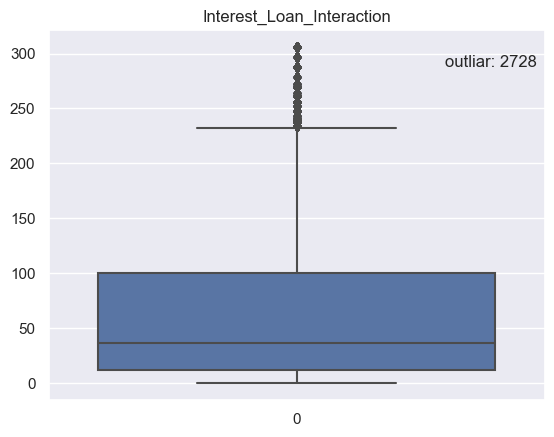

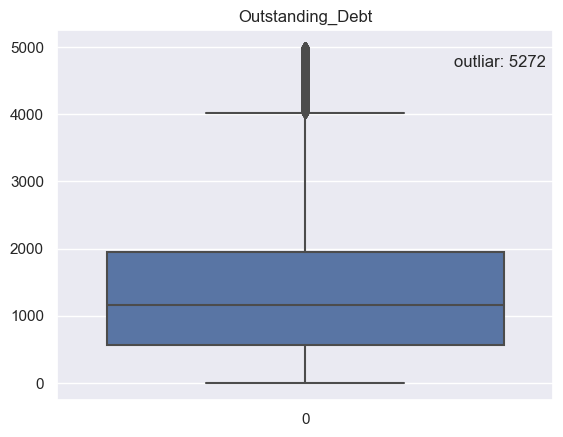

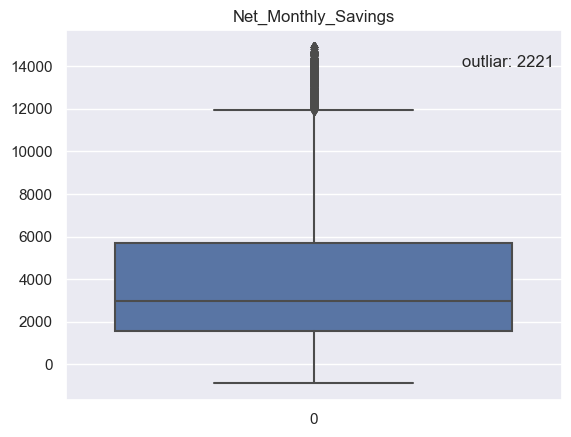

In [42]:

## Outlier Handling for Multiple Features

### Description:
# In this section of the code, outliers are being handled for a set of specific numerical features within the dataset. Outliers can negatively impact the performance of machine learning models and data analysis, so it's important to preprocess the data to mitigate their effects.

# ### Features List:
# The `features` list contains the names of the numerical features for which outlier handling is being performed. These features include:
# - Interest_Rate
# - Credit_History_Age
# - Credit_Mix
# - Type_of_Loan
# - Interest_Loan_Interaction
# - Outstanding_Debt
# - Num_Credit_Card
# - Net_Monthly_Savings

# ### Outlier Handling Loop:
# A for loop iterates through each feature in the `features` list, and the `out_liar` function is applied to each feature's data. This function detects and handles outliers for the specified feature.


# List of features for outlier handling
features = [
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]



# Apply outlier handling for each feature
for feature in features:
    x[feature] = out_liar(x[feature])


In [ ]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]
features_2 =[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    "Interest_Loan_Interaction",
    "Type_of_Loan" ,
    "Outstanding_Debt"
  ]

## Feature Selection and Data Scaling

In [43]:
### Description:
# In this section of the code, feature selection and data scaling are performed to prepare the dataset for machine learning model training. The selected features are standardized using the StandardScaler to ensure consistent scaling across different features.

# ### Features Selection:
# The `features` list contains the names of the selected features that will be used for modeling and analysis. These features are crucial in determining the outcome of the predictive model. The selected features include:
# - Interest_Rate
# - Credit_History_Age
# - Credit_Mix
# - Type_of_Loan
# - Interest_Loan_Interaction
# - Outstanding_Debt
# - Num_Credit_Card
# - Net_Monthly_Savings

# ### Data Scaling:
# The data from the selected features is standardized using the `StandardScaler`. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, which can improve the performance of machine learning algorithms that rely on distance-based calculations.



# List of selected features
features = [
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Outstanding_Debt",
    "Num_Credit_Card",
    "Net_Monthly_Savings",
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Select and scale the feature data
X = x[features]
scaled_data = scaler.fit_transform(X)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)


## Pie Chart Visualization

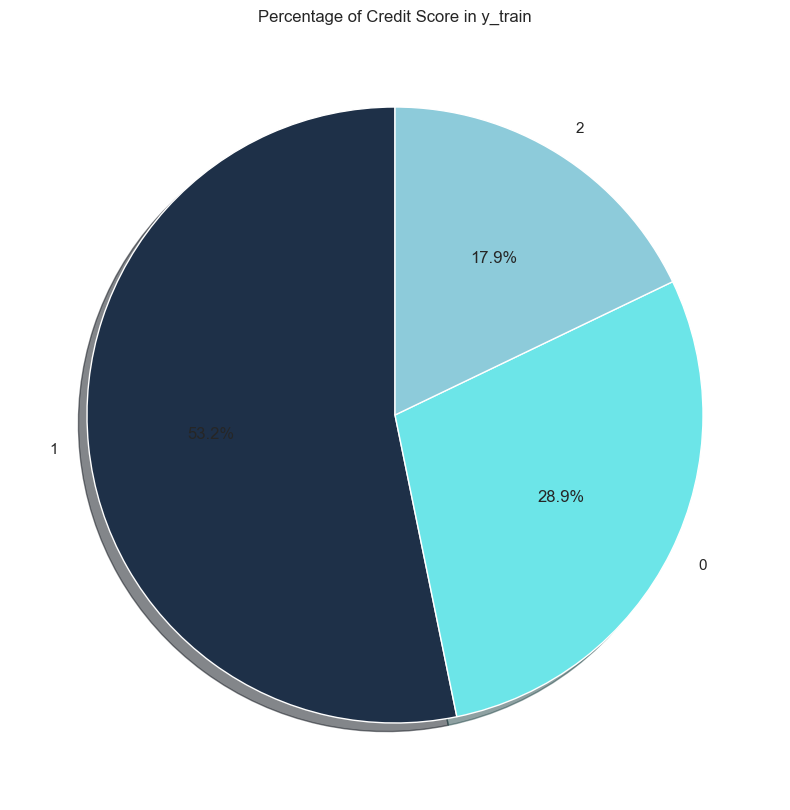

In [44]:
### Description:
# In this section of the code, a pie chart visualization is created to represent the percentage distribution of credit scores within the 'y_train' dataset. Custom colors are defined for a visually appealing chart.

# ### Custom Colors:
# The variable `custom_colors` contains a list of custom color codes that will be used to differentiate the segments of the pie chart. These colors are:
# - `'#1E3048'`: A shade of blue.
# - `'#6CE5E8'`: A teal or cyan color.
# - `'#8DCBDA'`: A pale blue color.

# ### Pie Chart:
# - A pie chart is generated using the `plt.pie()` function.
# - The data for the chart is obtained from the 'y_train' dataset, and the percentages are calculated using the `autopct` parameter.
# - The chart is given a shadow effect (`shadow=True`) and a starting angle of 90 degrees (`startangle=90`) for a visually appealing appearance.
# - The custom colors are applied to the chart segments using the `colors` parameter.
# - A title is added to the chart using `plt.title()` to provide context.


# Define custom colors
custom_colors = ['#1E3048', '#6CE5E8', '#8DCBDA']

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    y_train.value_counts(),
    labels=y_train.value_counts().index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=custom_colors,  # Use the custom colors here
)
plt.title("Percentage of Credit Score in y_train")
plt.show()


## Synthetic Minority Oversampling Technique (SMOTE) and Model Initialization

In [ ]:
### Description:
# In this section of the code, the Synthetic Minority Oversampling Technique (SMOTE) is applied to balance the class distribution in the training data. Additionally, several machine learning models are initialized for classification tasks.

# ### SMOTE:
# - The `SMOTE` technique is used to address class imbalance by oversampling the minority class (in this case, 'y_train') to achieve a more balanced distribution.
# - The `k_neighbors` parameter is set to 5, indicating that SMOTE will generate synthetic samples based on the 5 nearest neighbors.

# ### Machine Learning Models:
# - Four machine learning models are initialized for classification tasks:
#   - Random Forest Classifier (`rf_model`) with 100 estimators.
#   - Extra Trees Classifier (`et_model`) with 100 estimators.
#   - K-Nearest Neighbors Classifier (`knn_model`) with 5 neighbors.
#   - Decision Tree Classifier (`des_tree`).


# Apply SMOTE to balance the training data
sm = SMOTE(k_neighbors=5)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Initialize machine learning models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
des_tree = DecisionTreeClassifier(random_state=42)

### Pie Chart Visualization

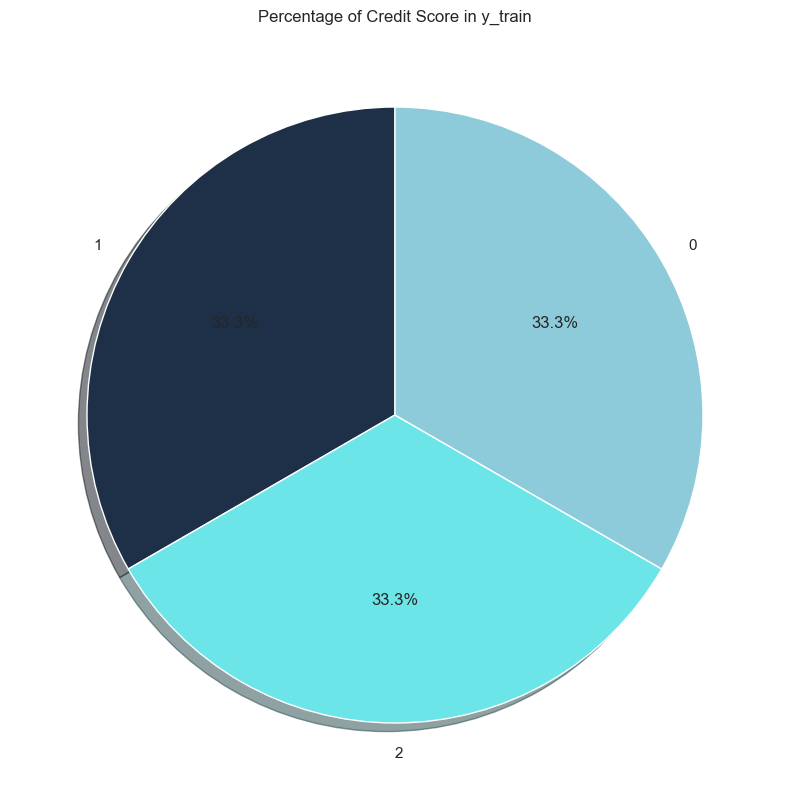

In [45]:
### Description:
# In this section of the code, a second pie chart visualization is created to represent the percentage distribution of credit scores within the 'y_train_sm' dataset. Similar to the previous pie chart, custom colors are defined for a visually appealing chart.

# ### Custom Colors:
# The variable `custom_colors` contains a list of custom color codes that will be used to differentiate the segments of the pie chart. These colors have been defined as:
# - `'#1E3048'`: A shade of blue.
# - `'#6CE5E8'`: A teal or cyan color.
# - `'#8DCBDA'`: A pale blue color.

# ### Pie Chart:
# - A pie chart is generated using the `plt.pie()` function.
# - The data for the chart is obtained from the 'y_train_sm' dataset, and the percentages are calculated using the `autopct` parameter.
# - The chart is given a shadow effect (`shadow=True`) and a starting angle of 90 degrees (`startangle=90`) for a visually appealing appearance.
# - The custom colors are applied to the chart segments using the `colors` parameter.
# - A title is added to the chart using `plt.title()` to provide context.


# Define custom colors
custom_colors = ['#1E3048', '#6CE5E8', '#8DCBDA']

# Plot the second pie chart
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.pie(
    y_train_sm.value_counts(),
    labels=y_train_sm.value_counts().index,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    colors=custom_colors,  # Use the custom colors here
)
plt.title("Percentage of Credit Score in y_train")
plt.show()


## Ensemble Models Initialization

In [ ]:
### Description:
# In this section of the code, several ensemble machine learning models are initialized for classification tasks. These ensemble methods combine the predictions of multiple base estimators to improve model performance.

# ### Bagging Classifier:
# - The `BaggingClassifier` is initialized with the `rf_model` (Random Forest Classifier) as the base estimator.
# - The `n_estimators` parameter is set to 100, indicating the number of base estimators to create.
# - Random state is set to 42 for reproducibility.

# ### AdaBoost Classifier:
# - The `AdaBoostClassifier` is initialized with the `rf_model` as the base estimator.
# - The `n_estimators` parameter is set to 100, specifying the number of boosting stages.
# - Random state is set to 42 for consistency.

# ### Gradient Boosting Classifier:
# - The `GradientBoostingClassifier` is initialized with 100 estimators.
# - Random state is set to 42 for reproducibility.

# ### Histogram-Based Gradient Boosting Classifier:
# - The `HistGradientBoostingClassifier` is initialized.
# - Random state is set to 42 for consistency.

# ### Random Trees Embedding:
# - The `RandomTreesEmbedding` is initialized with 100 estimators.
# - Random state is set to 42 for reproducibility.


# Initialize ensemble machine learning models
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(base_estimator=rf_model, n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
hist_model = HistGradientBoostingClassifier(random_state=42)
random_tree_model = RandomTreesEmbedding(n_estimators=100, random_state=42)


### AdaBoost Model Training and Evaluation


In [14]:
### Description:
# In this section of the code, the AdaBoost classifier model is trained using the balanced training dataset ('x_train_sm' and 'y_train_sm'). Subsequently, the model's accuracy is evaluated on the testing dataset ('x_test' and 'y_test').

# ### Model Training:
# - The `ada_model` (AdaBoostClassifier) is trained using the `fit` method.
# - The balanced training data 'x_train_sm' and 'y_train_sm' are used to train the model.

# ### Model Evaluation:
# - The accuracy of the AdaBoost model is calculated using the `accuracy_score` function.
# - Predictions are made on the testing data 'x_test', and the results are compared to the true labels 'y_test'.
# - The accuracy score is printed to assess the model's performance.


# Train the AdaBoost model
ada_model.fit(x_train_sm, y_train_sm)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("AdaBoost Accuracy: ", accuracy_score(y_test, ada_model.predict(x_test)))


: 

### Bagging Model Training and Evaluation

In [11]:
### Description:
# In this section of the code, the Bagging classifier model is trained using the balanced training dataset ('x_train_sm' and 'y_train_sm'). Subsequently, the model's accuracy is evaluated on the testing dataset ('x_test' and 'y_test').

# ### Model Training:
# - The `bagging_model` (BaggingClassifier) is trained using the `fit` method.
# - The balanced training data 'x_train_sm' and 'y_train_sm' are used to train the model.

# ### Model Evaluation:
# - The accuracy of the Bagging model is calculated using the `accuracy_score` function.
# - Predictions are made on the testing data 'x_test', and the results are compared to the true labels 'y_test'.
# - The accuracy score is printed to assess the model's performance.


# Train the Bagging model
bagging_model.fit(x_train_sm, y_train_sm)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Bagging Accuracy: ", accuracy_score(y_test, bagging_model.predict(x_test)))


Bagging Accuracy:  0.83665


### Gradient Boosting Model Training and Evaluation

In [11]:
### Description:
# In this section of the code, the Gradient Boosting classifier model is trained using the balanced training dataset ('x_train_sm' and 'y_train_sm'). Subsequently, the model's accuracy is evaluated on the testing dataset ('x_test' and 'y_test').

# ### Model Training:
# - The `gb_model` (GradientBoostingClassifier) is trained using the `fit` method.
# - The balanced training data 'x_train_sm' and 'y_train_sm' are used to train the model.

# ### Model Evaluation:
# - The accuracy of the Gradient Boosting model is calculated using the `accuracy_score` function.
# - Predictions are made on the testing data 'x_test', and the results are compared to the true labels 'y_test'.
# - The accuracy score is printed to assess the model's performance.


# Train the Gradient Boosting model
gb_model.fit(x_train_sm, y_train_sm)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Gradient Boosting Accuracy: ", accuracy_score(y_test, gb_model.predict(x_test)))


Gradient Boosting Accuracy:  0.67075


### Histogram-Based Gradient Boosting Model Training and Evaluation

In [12]:
### Description:
# In this section of the code, the Histogram-Based Gradient Boosting classifier model is trained using the balanced training dataset ('x_train_sm' and 'y_train_sm'). Subsequently, the model's accuracy is evaluated on the testing dataset ('x_test' and 'y_test').

# ### Model Training:
# - The `hist_model` (HistGradientBoostingClassifier) is trained using the `fit` method.
# - The balanced training data 'x_train_sm' and 'y_train_sm' are used to train the model.

# ### Model Evaluation:
# - The accuracy of the Hist Gradient Boosting model is calculated using the `accuracy_score` function.
# - Predictions are made on the testing data 'x_test', and the results are compared to the true labels 'y_test'.
# - The accuracy score is printed to assess the model's performance.


# Train the Hist Gradient Boosting model
hist_model.fit(x_train_sm, y_train_sm)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
print("Hist Gradient Boosting Accuracy: ", accuracy_score(y_test, hist_model.predict(x_test)))


Hist Gradient Boosting Accuracy:  0.7068


## Random Forest, Extra Trees, K-Nearest Neighbors, and Decision Tree Model Training

In [26]:
### Description:
# In this section of the code, four different machine learning models—Random Forest, Extra Trees, K-Nearest Neighbors (KNN), and Decision Tree—are trained using the balanced training dataset ('x_train_sm' and 'y_train_sm') for various classification tasks.

# ### Model Training:
# - The `rf_model` (Random Forest Classifier) is trained using the `fit` method.
# - The `et_model` (Extra Trees Classifier) is trained using the `fit` method.
# - The `knn_model` (K-Nearest Neighbors Classifier) is trained using the `fit` method.
# - The `des_tree` (Decision Tree Classifier) is trained using the `fit` method.


# Train the Random Forest model
rf_model.fit(x_train_sm, y_train_sm)

# Train the Extra Trees model
et_model.fit(x_train_sm, y_train_sm)

# Train the K-Nearest Neighbors model
knn_model.fit(x_train_sm, y_train_sm)

# Train the Decision Tree model
des_tree.fit(x_train_sm, y_train_sm)


DecisionTreeClassifier(random_state=42)

### Model Predictions

In [27]:
### Description:
# In this section of the code, predictions are made using four different machine learning models—Random Forest, Extra Trees, K-Nearest Neighbors (KNN), and Decision Tree. These models have been previously trained and are now used to predict the target variable for the testing dataset ('x_test').

# ### Model Predictions:
# - Predictions are generated using the `predict` method of each trained model.
# - Four sets of predictions are obtained:
#   - `rf_predictions`: Predictions made by the Random Forest model.
#   - `et_predictions`: Predictions made by the Extra Trees model.
#   - `knn_predictions`: Predictions made by the K-Nearest Neighbors (KNN) model.
#   - `des_predictions`: Predictions made by the Decision Tree model.


# Generate predictions using the trained models
rf_predictions = rf_model.predict(x_test)
et_predictions = et_model.predict(x_test)
knn_predictions = knn_model.predict(x_test)
des_predictions = des_tree.predict(x_test)


## Ensemble Model Initialization (Voting Classifier)

In [28]:
### Description:
# In this section of the code, an ensemble model known as the Voting Classifier is initialized. The Voting Classifier combines the predictions of multiple base classifiers—Random Forest, Extra Trees, Decision Tree, and K-Nearest Neighbors (KNN)—to make a final classification decision.

# ### Ensemble Model Initialization:
# - The `ensemble_model` (VotingClassifier) is initialized using the `VotingClassifier` class.
# - The `estimators` parameter contains a list of tuples, where each tuple consists of a name and a trained base classifier:
#   - ('Random Forest', rf_model): Random Forest classifier.
#   - ('Extra Trees', et_model): Extra Trees classifier.
#   - ('Decision Tree', des_tree): Decision Tree classifier.
#   - ('KNN', knn_model): K-Nearest Neighbors (KNN) classifier.
# - The `voting` parameter is set to 'hard', indicating that the final decision is made by a majority vote among the base classifiers.
# - The `weights` parameter assigns equal weights (1) to all base classifiers.


# Initialize the Voting Classifier ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Extra Trees', et_model),
    ("Decision Tree", des_tree),
    ("KNN", knn_model)
], voting='hard', weights=[1, 1, 1, 1])


### Ensemble Model Training (Voting Classifier)

In [29]:
### Description:
# In this section of the code, the ensemble model known as the Voting Classifier is trained using the balanced training dataset ('x_train_sm' and 'y_train_sm'). The Voting Classifier combines the predictions of multiple base classifiers—Random Forest, Extra Trees, Decision Tree, and K-Nearest Neighbors (KNN)—to make a final classification decision.

# ### Model Training:
# - The `ensemble_model` (VotingClassifier) is trained using the `fit` method.
# - The balanced training data 'x_train_sm' and 'y_train_sm' are used to train the ensemble model.


# Train the Voting Classifier ensemble model
ensemble_model.fit(x_train_sm, y_train_sm)


VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Extra Trees',
                              ExtraTreesClassifier(random_state=42)),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier())],
                 weights=[1, 1, 1, 1])

### Ensemble Model Prediction and Evaluation (Voting Classifier)

In [30]:
### Description:
# In this section of the code, predictions are made using the trained ensemble model known as the Voting Classifier. The ensemble model combines the predictions of multiple base classifiers—Random Forest, Extra Trees, Decision Tree, and K-Nearest Neighbors (KNN)—to make a final classification decision. The accuracy of the ensemble model is then evaluated on the testing dataset ('x_test' and 'y_test').

# ### Model Predictions:
# - Predictions are generated using the `predict` method of the trained ensemble model (`ensemble_model`).
# - The `ensemble_predictions` variable stores the predictions made by the ensemble model.

# ### Model Evaluation:
# - The accuracy of the ensemble model is calculated using the `accuracy_score` function.
# - Predictions made by the ensemble model (`ensemble_predictions`) are compared to the true labels in the testing dataset ('y_test').
# - The accuracy score is printed to assess the performance of the ensemble model.


# Generate predictions using the ensemble model
ensemble_predictions = ensemble_model.predict(x_test)

# Evaluate the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")


Ensemble Model Accuracy: 0.8426


### Model Accuracy Evaluation

In [31]:
### Description:
# In this section of the code, the accuracy of various machine learning models is evaluated on the testing dataset ('x_test' and 'y_test'). Five models are assessed for their accuracy: Random Forest Classifier, Extra Trees Classifier, K-Nearest Neighbors (KNN) Classifier, the ensemble model (Voting Classifier), and Decision Tree Classifier.

# ### Model Evaluation:
# - The accuracy of each model is calculated using the `accuracy_score` function.
# - The true labels ('y_test') and the predictions from each model are compared to compute the accuracy.
# - The accuracy scores for each model are printed to assess their performance.


# Calculate and print accuracy scores for each model
rf_accuracy = accuracy_score(y_test, rf_predictions)
et_accuracy = accuracy_score(y_test, et_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
des_accuracy = accuracy_score(y_test, des_predictions)

print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Extra Trees Classifier Accuracy: {et_accuracy}")
print(f"KNN Classifier Accuracy: {knn_accuracy}")
print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Decision Tree Accuracy: {des_accuracy}")


Random Forest Classifier Accuracy: 0.8399
Extra Trees Classifier Accuracy: 0.83805
KNN Classifier Accuracy: 0.8068
Ensemble Model Accuracy: 0.8426
Decision Tree Accuracy: 0.8301


### Visualization: Model Accuracy Bar Plot

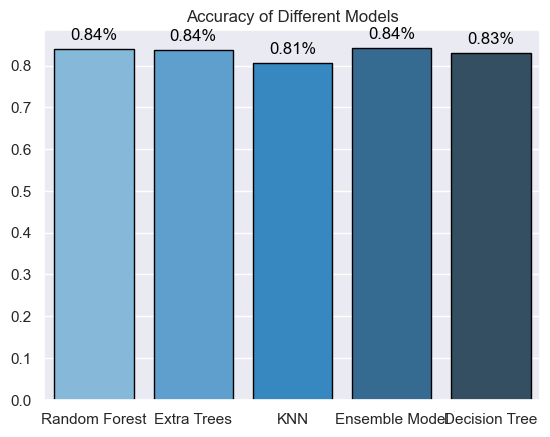

In [36]:
### Description:
# In this section of the code, a bar plot is created to visualize the accuracy of different machine learning models. The accuracy scores of five models—Random Forest Classifier, Extra Trees Classifier, K-Nearest Neighbors (KNN) Classifier, the ensemble model (Voting Classifier), and Decision Tree Classifier—are displayed in the bar chart.

# ### Bar Plot:
# - A DataFrame named `res_plot` is created to store the accuracy scores of each model.
# - The `sns.barplot()` function from the Seaborn library is used to generate the bar plot.
# - The accuracy scores are plotted as bars, and the `palette` parameter is set to "Blues_d" to define the color palette.
# - Bar properties like `linewidth` and `edgecolor` are customized for aesthetics.
# - Labels with accuracy percentages are added to each bar using annotations for clarity.
# - The plot is given a title to provide context.


# Create the accuracy bar plot
res_plot = pd.DataFrame({
    "Random Forest": [rf_accuracy],
    "Extra Trees": [et_accuracy],
    "KNN": [knn_accuracy],
    "Ensemble Model": [ensemble_accuracy],
    "Decision Tree": [des_accuracy]
}, index=["Accuracy"])

# Set Seaborn theme and generate the bar plot
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)

# Add accuracy percentage text to the bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height()+.00001 * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )

# Set the title for the bar plot
plt.title("Accuracy of Different Models")
plt.show()


## Cross-Validation and Model Accuracy Evaluation

In [37]:
### Description:
# In this section of the code, cross-validation is performed to evaluate the accuracy of different machine learning models. Five models—Random Forest Classifier, Extra Trees Classifier, K-Nearest Neighbors (KNN) Classifier, the ensemble model (Voting Classifier), and Decision Tree Classifier—are assessed using cross-validation on the balanced training dataset ('x_train_sm' and 'y_train_sm').

# ### Cross-Validation:
# - Cross-validation is carried out using the `cross_val_predict` function from scikit-learn with 10-fold cross-validation (cv=10).
# - Predictions are obtained for each model during cross-validation:
#   - `cross_val_rf`: Predictions for Random Forest Classifier.
#   - `cross_val_et`: Predictions for Extra Trees Classifier.
#   - `cross_val_knn`: Predictions for KNN Classifier.
#   - `cross_val_des`: Predictions for Decision Tree Classifier.
#   - `cross_val_ensemble`: Predictions for the ensemble model (Voting Classifier).

# ### Model Accuracy Evaluation:
# - The accuracy of each model is calculated using the `accuracy_score` function.
# - Accuracy scores are calculated by comparing the predictions obtained during cross-validation (`cross_val_rf`, `cross_val_et`, etc.) to the true labels ('y_train_sm').
# - The accuracy scores for each model are printed to assess their performance.


# Perform cross-validation and evaluate accuracy
cross_val_rf = cross_val_predict(rf_model, x_train_sm, y_train_sm, cv=10)
cross_val_et = cross_val_predict(et_model, x_train_sm, y_train_sm, cv=10)
cross_val_knn = cross_val_predict(knn_model, x_train_sm, y_train_sm, cv=10)
cross_val_des = cross_val_predict(des_tree, x_train_sm, y_train_sm, cv=10)
cross_val_ensemble = cross_val_predict(ensemble_model, x_train_sm, y_train_sm, cv=10)

# Print accuracy scores for each model
print(f"Random Forest Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_rf)}")
print(f"Extra Trees Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_et)}")
print(f"KNN Classifier Accuracy: {accuracy_score(y_train_sm, cross_val_knn)}")
print(f"Ensemble Model Accuracy: {accuracy_score(y_train_sm, cross_val_ensemble)}")
print(f"Decision Tree Accuracy: {accuracy_score(y_train_sm, cross_val_des)}")


Random Forest Classifier Accuracy: 0.884454883538853
Extra Trees Classifier Accuracy: 0.8846271285965942
KNN Classifier Accuracy: 0.867754942258759
Ensemble Model Accuracy: 0.8861068702290076
Decision Tree Accuracy: 0.8684126052064983


### Visualization: Model Accuracy Bar Plot with Cross Validation

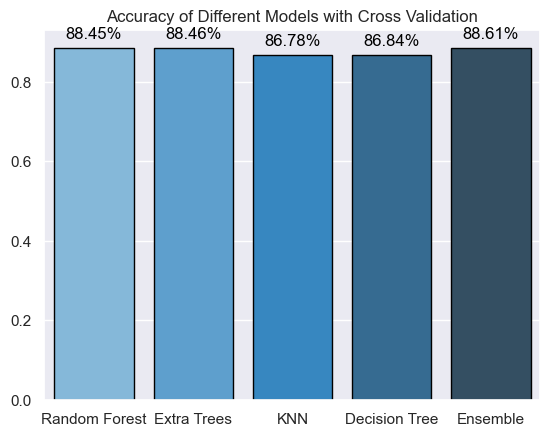

In [38]:
### Description:
# In this section of the code, a bar plot is created to visualize the accuracy of different machine learning models after performing cross-validation. The accuracy scores of five models—Random Forest Classifier, Extra Trees Classifier, K-Nearest Neighbors (KNN) Classifier, Decision Tree Classifier, and the ensemble model (Voting Classifier)—are displayed in the bar chart.

# ### Bar Plot:
# - A DataFrame named `res_plot_vol` is created to store the accuracy scores of each model after cross-validation.
# - The `sns.barplot()` function from the Seaborn library is used to generate the bar plot.
# - The accuracy scores after cross-validation are plotted as bars, and the `palette` parameter is set to "Blues_d" to define the color palette.
# - Bar properties like `linewidth` and `edgecolor` are customized for aesthetics.
# - Labels with accuracy percentages after cross-validation are added to each bar using annotations for clarity.
# - The plot is given a title to provide context.


# Create the accuracy bar plot with cross-validation results
res_plot_vol = pd.DataFrame({
    "Random Forest": [accuracy_score(y_train_sm, cross_val_rf)],
    "Extra Trees": [accuracy_score(y_train_sm, cross_val_et)],
    "KNN": [accuracy_score(y_train_sm, cross_val_knn)],
    "Decision Tree": [accuracy_score(y_train_sm, cross_val_des)],
    "Ensemble": [accuracy_score(y_train_sm, cross_val_ensemble)]
})

# Set Seaborn theme and generate the bar plot
sns.set_theme(style="darkgrid")
sns.barplot(data=res_plot_vol, palette="Blues_d", linewidth=1, edgecolor="black", saturation=1)

# Add accuracy percentage text to the bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{round(p.get_height() * 100, 2)}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 10),
        textcoords="offset points",
    )

# Set the title for the bar plot
plt.title("Accuracy of Different Models with Cross Validation")
plt.show()


## Classification Scores for Features

In [ ]:
# ### Description:
# In this section of the code, a dictionary named `classifiy` is defined to store classification scores for various features. 
# These scores likely represent the importance or effectiveness of each feature in a classification task. 
# The scores are associated with feature names such as "Age," "Annual_Income," "Monthly_Inhand_Salary," etc.

# ### Classification Scores:
# - The `classifiy` dictionary contains feature names as keys and their corresponding classification scores as values.
# - These scores indicate the contribution or relevance of each feature to the classification process.


# Define the classification scores for features
classifiy = {
   "Age":0.83015,
   "Annual_Income":0.8319,
   "Monthly_Inhand_Salary":0.83195,
   "Num_Bank_Accounts":0.8315,
   "Credit_Utilization":0.8227,
   "Net_Monthly_Savings":0.8323,
   "Amount_invested_monthly":0.83175,
   "Total_EMI_per_month":0.8311,
   "Payment_of_Min_Amount":0.8313,
   "Num_Credit_Inquiries":0.8302,
   "Changed_Credit_Limit":0.81965,
   "Num_of_Delayed_Payment":0.8209,
   "Delay_from_due_date":0.8223,
   "Num_of_Loan":0.8314,
   "Payment_Behaviour":0.80715,
   "Monthly_Balance":0.81445,
   "Debt_to_Income_Ratio":0.8316,
   "EMI_to_Income_Ratio":0.83115,
   "Investment_to_Income_Ratio":0.8317,
   "Loan_to_Income_Ratio":0.8318,
   "Total_Financial_Obligations":0.83105,
}
# Print the classification scores
print(classifiy) 


{'Age': 0.83015, 'Annual_Income': 0.8319, 'Monthly_Inhand_Salary': 0.83195, 'Num_Bank_Accounts': 0.8315, 'Credit_Utilization': 0.8227, 'Net_Monthly_Savings': 0.8323, 'Amount_invested_monthly': 0.83175, 'Total_EMI_per_month': 0.8311, 'Payment_of_Min_Amount': 0.8313, 'Num_Credit_Inquiries': 0.8302, 'Changed_Credit_Limit': 0.81965, 'Num_of_Delayed_Payment': 0.8209, 'Delay_from_due_date': 0.8223, 'Num_of_Loan': 0.8314, 'Payment_Behaviour': 0.80715, 'Monthly_Balance': 0.81445, 'Debt_to_Income_Ratio': 0.8316, 'EMI_to_Income_Ratio': 0.83115, 'Investment_to_Income_Ratio': 0.8317, 'Loan_to_Income_Ratio': 0.8318, 'Total_Financial_Obligations': 0.83105}
